In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/DMVWrittenTests.csv')
dataset.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
dataset.describe()

,DMV_Test_1,DMV_Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [7]:
X = dataset.iloc[:, :-1].values
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [11]:
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# print the shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 2)
(75,)
(25, 2)
(25,)


In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.21231162,  1.56561722],
       [-0.25955531,  1.55187648],
       [ 0.40868272,  1.17917568],
       [ 0.04415538, -0.04545932],
       [-0.93625882,  1.12291258],
       [ 0.43897846,  0.97792765],
       [ 1.09983741,  0.12613752],
       [ 1.3530897 ,  0.51878779],
       [ 0.67773732,  1.31723786],
       [ 1.60623254, -0.34388858],
       [ 1.30518395, -1.52890797],
       [ 0.20754573,  1.36053574],
       [ 1.52669976,  0.07583901],
       [-1.77736947, -0.95278034],
       [-0.37031741,  0.44935458],
       [-1.76622885, -1.25695651],
       [-1.52182658, -1.09010646],
       [ 1.37015281, -0.09993322],
       [-0.72685674, -1.09887325],
       [ 0.61678403,  0.42191178],
       [-0.608389  ,  1.16196159],
       [ 0.07483633, -1.1083603 ],
       [ 0.85484358, -0.59430833],
       [ 0.40933583, -1.38088999],
       [-1.04287944, -0.59386388],
       [ 1.174861  ,  1.07128712],
       [ 0.26302936,  0.58789005],
       [-1.55421147,  0.56499563],
       [-1.27980121,

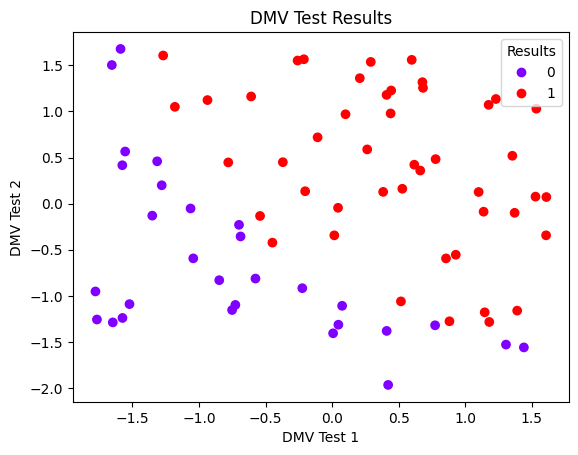

In [23]:
# lets plot the data with 2 features from X and use y as the color
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.title('DMV Test Results')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
legend = plt.legend(*scatter.legend_elements(), title='Results')
plt.show()


[(1, (1.0, 0.92)), (3, (0.9466666666666667, 0.92)), (15, (0.9066666666666666, 0.92)), (7, (0.92, 0.88)), (9, (0.9333333333333333, 0.88))]


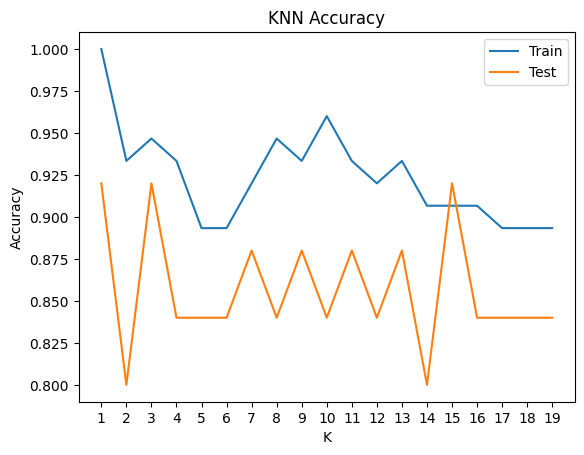

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
prediction_list = []
for i in range(1, 20):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_pred = classifier.predict(X_test)
    prediction_list.append((accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_pred)))

print(sorted(zip(range(1,20),prediction_list), reverse=True, key=lambda x: x[1][1])[:5])
plt.plot(range(1, 20), prediction_list)
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 20))
plt.legend(['Train', 'Test'])

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[11  0]
 [ 2 12]]
0.92


Text(0.5, 1.0, 'Confusion Matrix')

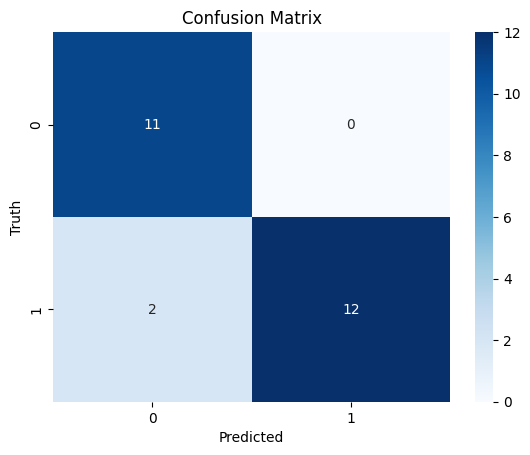

In [93]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')


In [94]:
# Visualising the Training set results
X1, X2 = X_train[:, 0], X_train[:, 1]
xx, yy = np.meshgrid(np.arange(start = X1.min() - 1, stop = X1.max() + 1, step = 0.01),
                        np.arange(start = X2.min() - 1, stop = X2.max() + 1, step = 0.01))
Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

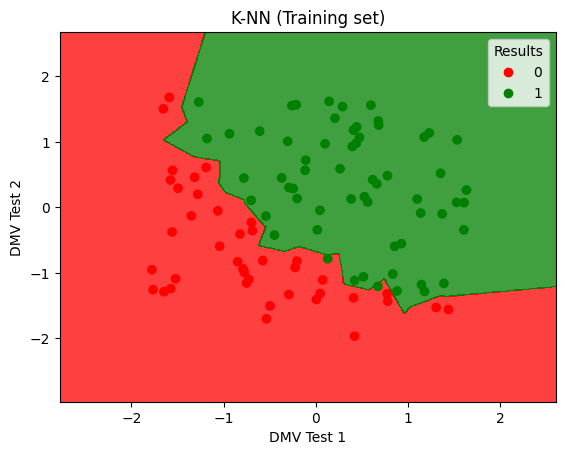

In [98]:
from matplotlib.colors import ListedColormap
plt.contourf(xx, yy, Z,alpha = 0.75, cmap = ListedColormap(('red', 'green')))
scatter = plt.scatter(X1, X2, c = y_train, cmap = ListedColormap(('red', 'green')))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = ListedColormap(('red', 'green')))
plt.title('K-NN (Training set)')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
legend = plt.legend(*scatter.legend_elements(), title='Results')
plt.show()